# Gradient Descent

Gradient descent is a machine learning technique used to minimizing cost functions. Here is an excellent article about gradient descent and I highly recommend reading [it](https://towardsdatascience.com/gradient-descent-in-a-nutshell-eaf8c18212f0).

This program is written to see the effect of learning rate to the speed of convergence. The function that we'll use for this exercise is f(x) = 0.5(x^2 - y)^2 + 0.5(x - 1)^2. The obvious local minimum is (1, 1), so we'll set the initial x and y to something different.

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# f(x) = 0.5(x^2 - y)^2 + 0.5(x - 1)^2
def cost_function(x, y):
  return 0.5 * (x**2 - y)**2 + 0.5 * (x - 1)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([cost_function(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<Figure size 640x480 with 1 Axes>

Since juypter cannot display the 3D plot, I'll put a screenshot here instead.
![screenshot](screenshot.jpg "screenshot")

Take partial derivatives of the function (cost_function) with respect to x and y.

In [2]:
def dx(x, y):
    return 2.0 * x * (x**2 - y) + (x - 1)

def dy(x, y):
    return -(float(x)**2 - y)

Now we can write our gradient descent algorithm and test different learning rate. We want to stop when the derivatives are close to 0, and update variables of f(x) with the following rule: x = x - learning_rate * df/dx

In [3]:
import math

def gradient_descent(x=0, y=0, learning_rate=0.0001, threshold=0.001, max_iterations=100000):
    # calculate gradient for each dimension then record the largest one
    gradient_x = dx(x, y)
    gradient_y = dy(x, y)
    try:
        current_gradient_squared = math.sqrt(gradient_x ** 2 + gradient_y ** 2)
    except Exception as e:
        print("Number too large" + str(e))
        return
    iteration_counter = 0
    gradients = [current_gradient_squared]
    
    # keep looping until gradient is below threshold, or below maximum iteration count
    while current_gradient_squared > threshold and iteration_counter < max_iterations:
        iteration_counter += 1
        
        # update our positions in each dimension
        x = x - learning_rate * gradient_x
        y = y - learning_rate * gradient_y
        
        # calculate new gradient
        gradient_x = dx(x, y)
        gradient_y = dy(x, y)
        try:
            current_gradient_squared = math.sqrt(gradient_x ** 2 + gradient_y ** 2)
        except Exception as e:
            print("Number too large" + str(e))
            return
        gradients.append(current_gradient_squared)
    
    print "Number of iterations:", iteration_counter
    
    return x, y, gradients

Now, let's try out different learning rates and see the effects. We will write a simple function that takes in a list of learning rates and plot out the the first 30 gradients for each example.

Number of iterations: 3591
Learning rate: 0.01 , Learned (x, y): (1.022683922931348, 1.0551254200458973)
Number of iterations: 36120
Learning rate: 0.001 , Learned (x, y): (1.0227161328470165, 1.055204228849138)
Number of iterations: 100000
Learning rate: 0.0001 , Learned (x, y): (1.6997327319760724, 3.07927909384098)


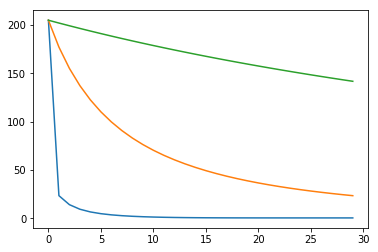

In [4]:
def test_learning(function, x, y, learning_rates, threshold, max_iterations):
    iterations = range(30)
    for rate in learning_rates:
        final_x, final_y, gradients = function(x, y, rate, threshold, max_iterations)
        plt.plot(iterations, gradients[:30])
        print "Learning rate:", rate, ", Learned (x, y):", (final_x, final_y)

test_rates = [0.01, 0.001, 0.0001]
test_learning(gradient_descent, 5, 5, test_rates, 0.01, 100000)
plt.show()

We can try a larger learning rate and see what would happen.

In [5]:
gradient_descent(x=5, y=5, learning_rate=0.1)

Number too large(34, 'Result too large')


As we can see from the result, it is important to choose an appropreiate learning rate. If it's too big, it might never converge since it will just step over the local minimum. In fact, the example above actually shows that not only did it not converge, both x and y actually goes to infinity. This is due to large gradient and as we step over our desired values, it ended up at a higher value but on the opposite side of where we started. Read why big learning rate can lead to divergence [here](https://stats.stackexchange.com/questions/315664/gradient-descent-explodes-if-learning-rate-is-too-large). If it's too small, it will take a lot longer to converge.